In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import torch

## Test the implementation

In [2]:
names = os.listdir('data/complex/val')
name = names[0]
img = plt.imread(os.path.join('data/complex/val', name))
label = plt.imread(os.path.join('data/complex/label/val', name))

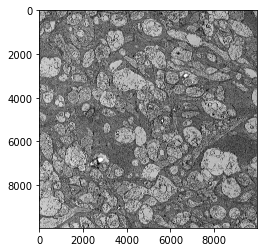

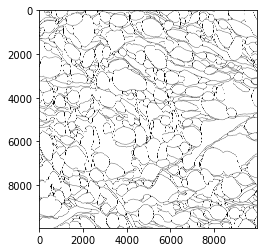

In [3]:
plt.imshow(img)
plt.show()
plt.imshow(label)
plt.show()

In [4]:
shape = img.shape
input = torch.Tensor(np.transpose(img, (2, 0, 1)).reshape(1, shape[2], shape[0], shape[1]))
input = input[:,:,0:572,0:572]

In [5]:
from src.models import U_Net
model = U_Net.U_Net(output_ch=1)
model = model.cuda(device=0)
input = input.cuda(device=0)
output = model(input)
print(output.shape)

torch.Size([1, 1, 388, 388])


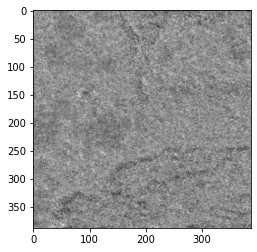

In [6]:
np_out = output.cpu().detach().numpy().squeeze()
plt.imshow(np_out, cmap='gray')

## Try to overfit the U-Net

In [8]:
import torch.optim as optim
from src.loss import dice_loss
from torchvision import transforms
import tqdm

criterion = dice_loss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

shape = label.shape
gt = torch.Tensor(label.reshape(1, shape[2], shape[0], shape[1]))
gt = gt[:,0,0:572,0:572]
gt = gt.cuda(device=0)
size = (388, 388)
gt = transforms.CenterCrop(size)(gt)

In [9]:
iters = 2000
losses = []
for i in tqdm.tqdm(range(iters)):  # loop over the dataset multiple times
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    pred = model(input)
    loss = criterion(pred, gt)
    loss.backward()
    optimizer.step()

    # print statistics
    if i % 20 == 19:
#         print('For iter %4d: loss = %.3f' %
#               (i + 1, loss.item()))
        losses.append(loss.item())

100%|███████████████████████████████████████████| 2000/2000 [05:01<00:00,  6.63it/s]


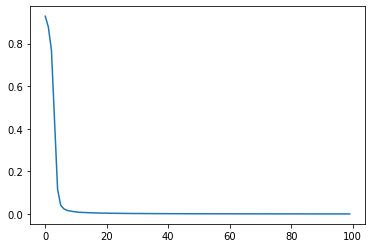

In [10]:
losses = np.array(losses)
plt.plot(losses)
plt.show()

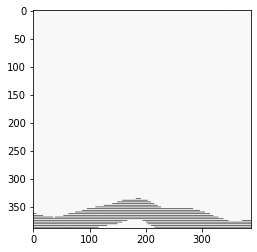

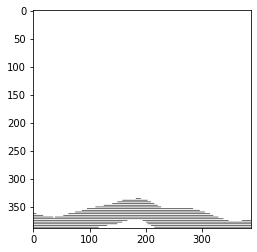

In [11]:
pred = model(input)
np_pred = pred.cpu().detach().numpy().squeeze()
np_gt = gt.cpu().detach().numpy().squeeze()
plt.imshow(np_pred, cmap='gray')
plt.show()
plt.imshow(np_gt, cmap='gray')
plt.show()